In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Let's start with global temperatures first.
# Load the dataset
df = pd.read_csv('/home/leslie-jordan/Downloads/GlobalTemperatures.csv')

# Convert date to datetime and extract year
df['dt'] = pd.to_datetime(df['dt'])
df['Year'] = df['dt'].dt.year

# Group by year and calculate the mean temperature
grouped_df = df.groupby(['Year'])['LandAndOceanAverageTemperature'].mean().reset_index()

# Handle missing values by filling forward and backward
grouped_df['LandAndOceanAverageTemperature'] = grouped_df['LandAndOceanAverageTemperature'].fillna(method='ffill').fillna(method='bfill')

# Create feature matrix X and target vector y
X = grouped_df[['Year']].values
y = grouped_df['LandAndOceanAverageTemperature'].values

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Define hyperparameters for tuning
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    }
}

# Hyperparameter tuning and model evaluation
best_models = {}
results = []

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='r2')
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    
    # Predictions
    y_pred = best_model.predict(X)
    
    # Evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    results.append({
        'Model': name,
        'Best Parameters': grid_search.best_params_,
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })

results_df = pd.DataFrame(results)
print(results_df)

/tmp/ipykernel_43989/1955991706.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  grouped_df['LandAndOceanAverageTemperature'] = grouped_df['LandAndOceanAverageTemperature'].fillna(method='ffill').fillna(method='bfill')


               Model                                    Best Parameters  \
0  Linear Regression                                                 {}   
1      Decision Tree          {'max_depth': 10, 'min_samples_split': 5}   
2      Random Forest  {'max_depth': 20, 'min_samples_split': 5, 'n_e...   

        MAE       MSE        R2  
0  0.122783  0.025612  0.692563  
1  0.019471  0.001145  0.986253  
2  0.025862  0.001794  0.978469  


In [3]:
#Great! Let's take a look at countries now.

# Load the countries dataset
df_country = pd.read_csv('/home/leslie-jordan/Downloads/GlobalLandTemperaturesByCountry.csv')

# Convert date to datetime and extract year
df_country['dt'] = pd.to_datetime(df_country['dt'])
df_country['Year'] = df_country['dt'].dt.year

# Group by year and country, then calculate the mean temperature
grouped_df_country = df_country.groupby(['Year', 'Country'])['AverageTemperature'].mean().reset_index()

# Handle missing values by filling forward and backward
grouped_df_country['AverageTemperature'] = grouped_df_country['AverageTemperature'].fillna(method='ffill').fillna(method='bfill')

# Create feature matrix X and target vector y
X = grouped_df_country[['Year']].values
y = grouped_df_country['AverageTemperature'].values

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Define hyperparameters for tuning
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    }
}

# Hyperparameter tuning and model evaluation
best_models = {}
results = []

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='r2')
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    
    # Predictions
    y_pred = best_model.predict(X)
    
    # Evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    results.append({
        'Model': name,
        'Best Parameters': grid_search.best_params_,
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })

results_df_country = pd.DataFrame(results)
print(results_df_country)

/tmp/ipykernel_43989/3159262855.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  grouped_df_country['AverageTemperature'] = grouped_df_country['AverageTemperature'].fillna(method='ffill').fillna(method='bfill')


               Model                                    Best Parameters  \
0  Linear Regression                                                 {}   
1      Decision Tree          {'max_depth': 10, 'min_samples_split': 2}   
2      Random Forest  {'max_depth': 20, 'min_samples_split': 5, 'n_e...   

        MAE        MSE        R2  
0  7.627634  82.388924  0.090912  
1  7.372470  78.794278  0.130576  
2  7.371457  78.792351  0.130597  


In [4]:
#Great! Let's look at the cities data set now.

# Load the cities dataset
df_city = pd.read_csv('/home/leslie-jordan/Downloads/GlobalLandTemperaturesByCity.csv')

# Convert date to datetime and extract year
df_city['dt'] = pd.to_datetime(df_city['dt'])
df_city['Year'] = df_city['dt'].dt.year

# Group by year and country (or city), then calculate the mean temperature
grouped_df_city = df_city.groupby(['Year', 'Country'])['AverageTemperature'].mean().reset_index()

# Handle missing values by filling forward and backward
grouped_df_city['AverageTemperature'] = grouped_df_city['AverageTemperature'].fillna(method='ffill').fillna(method='bfill')

# Create feature matrix X and target vector y
X = grouped_df_city[['Year']].values
y = grouped_df_city['AverageTemperature'].values

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Define hyperparameters for tuning
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    }
}

# Hyperparameter tuning and model evaluation
best_models = {}
results = []

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='r2')
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    
    # Predictions
    y_pred = best_model.predict(X)
    
    # Evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    results.append({
        'Model': name,
        'Best Parameters': grid_search.best_params_,
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })

results_df_city = pd.DataFrame(results)
print(results_df_city)

/tmp/ipykernel_43989/490374210.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  grouped_df_city['AverageTemperature'] = grouped_df_city['AverageTemperature'].fillna(method='ffill').fillna(method='bfill')


               Model                                    Best Parameters  \
0  Linear Regression                                                 {}   
1      Decision Tree          {'max_depth': 10, 'min_samples_split': 2}   
2      Random Forest  {'max_depth': 10, 'min_samples_split': 5, 'n_e...   

        MAE        MSE        R2  
0  6.539314  56.680404  0.103323  
1  6.346649  54.555271  0.136942  
2  6.347221  54.559397  0.136877  


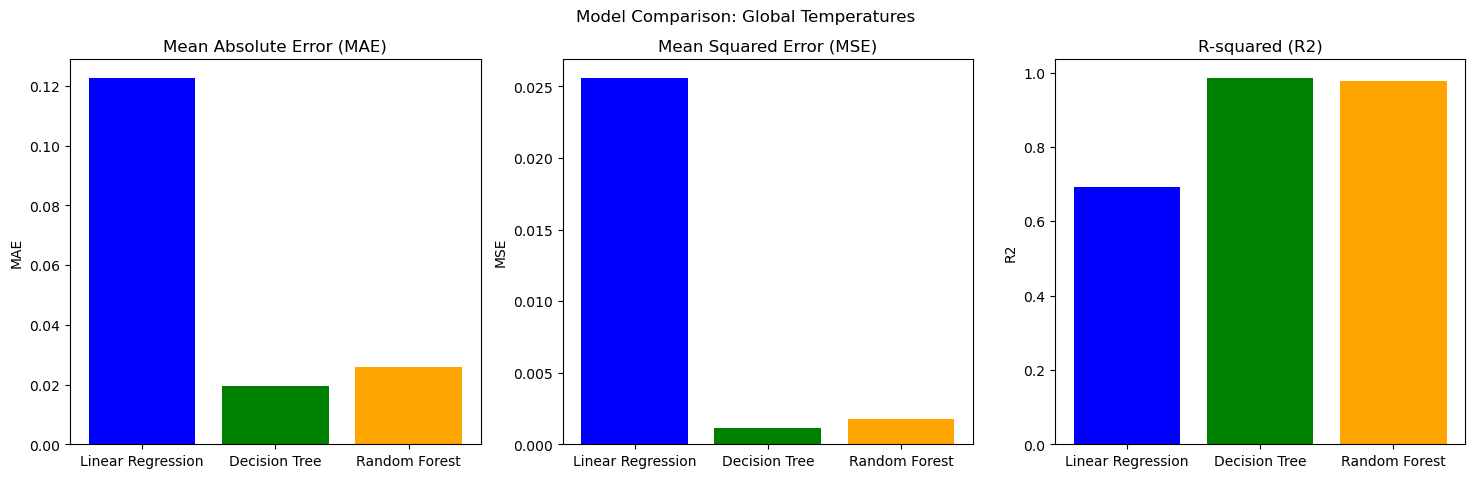

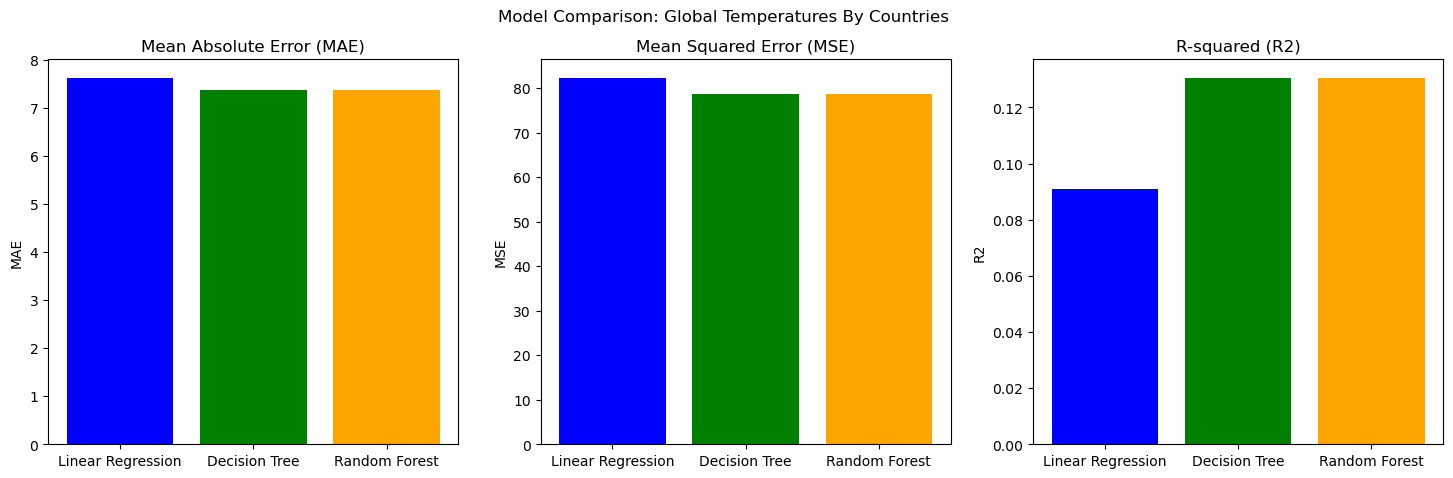

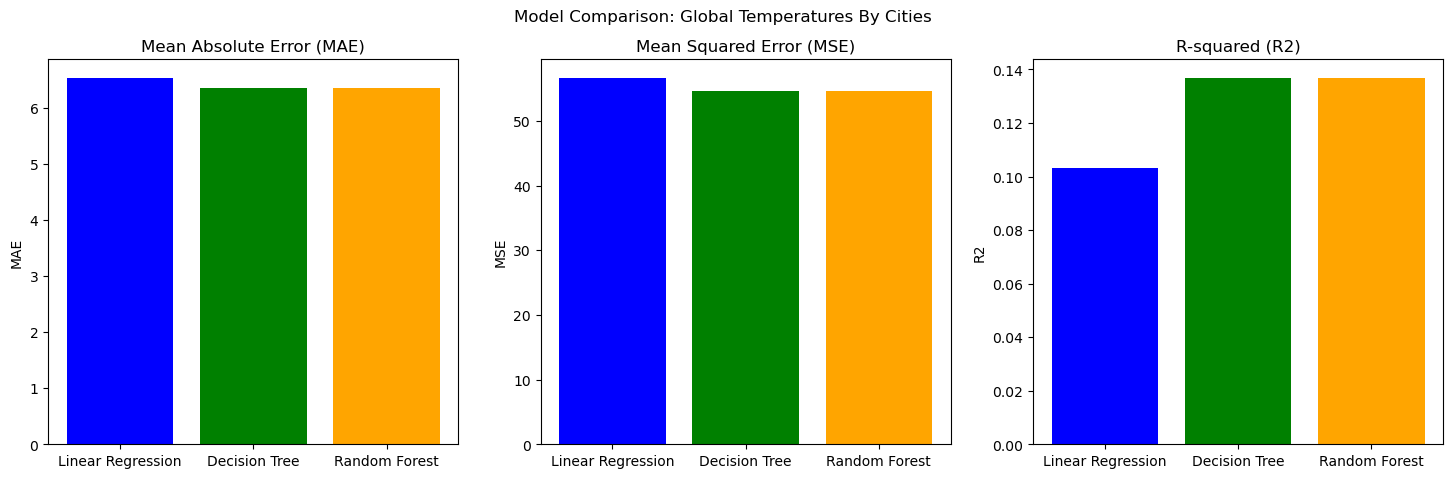

In [1]:
import matplotlib.pyplot as plt

# Define the results for each request
results_1 = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [0.122783, 0.019471, 0.025862],
    'MSE': [0.025612, 0.001145, 0.001794],
    'R2': [0.692563, 0.986253, 0.978469]
}

results_2 = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [7.627634, 7.372470, 7.371457],
    'MSE': [82.388924, 78.794278, 78.792351],
    'R2': [0.090912, 0.130576, 0.130597]
}

results_3 = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [6.539314, 6.346649, 6.347221],
    'MSE': [56.680404, 54.555271, 54.559397],
    'R2': [0.103323, 0.136942, 0.136877]
}

# Function to create graphs for each request
def plot_results(results, title):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(title)

    # MAE plot
    axs[0].bar(results['Model'], results['MAE'], color=['blue', 'green', 'orange'])
    axs[0].set_title('Mean Absolute Error (MAE)')
    axs[0].set_ylabel('MAE')

    # MSE plot
    axs[1].bar(results['Model'], results['MSE'], color=['blue', 'green', 'orange'])
    axs[1].set_title('Mean Squared Error (MSE)')
    axs[1].set_ylabel('MSE')

    # R2 plot
    axs[2].bar(results['Model'], results['R2'], color=['blue', 'green', 'orange'])
    axs[2].set_title('R-squared (R2)')
    axs[2].set_ylabel('R2')

    plt.show()

# Plot results for each request
plot_results(results_1, 'Model Comparison: Global Temperatures')
plot_results(results_2, 'Model Comparison: Global Temperatures By Countries')
plot_results(results_3, 'Model Comparison: Global Temperatures By Cities')

In [ ]:
#Conclusion of the results.

#In the Global Temperatures data set, the Decision Tree model emerged as the best fit for the data. 
#It outperformed both the Linear Regression and Random Forest models across all evaluation metrics. 
#Specifically, the Decision Tree model achieved the lowest Mean Absolute Error (MAE) of 0.019471, the lowest Mean Squared Error (MSE) of 0.001145, and the highest R-squared value of 0.986253. 
#These results indicate that the Decision Tree model provides the most accurate predictions, with the smallest average absolute error and the highest proportion of variance explained. 
#Therefore, the Decision Tree model is the most suitable for this dataset.

#For the Global Temperatures by Country data set, the Random Forest model slightly outperformed the Decision Tree model, making it the best choice. 
#The Random Forest model achieved the lowest MAE of 7.371457, the lowest MSE of 78.792351, and the highest R-squared value of 0.130597. 
#While the Decision Tree model performed similarly with a MAE of 7.372470 and an MSE of 78.794278, the Random Forest's marginally better performance in these metrics suggests it provides a slightly better fit for the data. 
#Consequently, the Random Forest model is the preferred choice for this analysis.

#In the Global Temperatures by City data set, the Decision Tree model once again proved to be the best fit. 
#It achieved the lowest MAE of 6.346649, the lowest MSE of 54.555271, and the highest R-squared value of 0.136942. 
#Although the Random Forest model had comparable performance with a MAE of 6.347221 and an MSE of 54.559397, the Decision Tree model's slight edge in all metrics indicates it provides the best overall fit for the dataset.

In [ ]:
#Across all data sets, the Decision Tree model consistently demonstrated superior performance, making it the most robust and effective model for capturing the underlying patterns in the data. 
#The Random Forest model also performed well, particularly in the countries data set, highlighting its strength as a contender, especially when ensemble methods are beneficial. 
#In contrast, the Linear Regression model consistently underperformed, suggesting that tree-based models are better suited for these datasets due to their ability to handle complex, non-linear relationships.